/var/folders/9z/26jz_ql9507379s_bv_2qyq40000gn/T/ipykernel_91029/1662770098.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=start_date, end=end_date)["Close"]
[*********************100%***********************]  1 of 1 completed
/var/folders/9z/26jz_ql9507379s_bv_2qyq40000gn/T/ipykernel_91029/1662770098.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tlt = yf.download("TLT", start=start_date, end=end_date)["Close"]
[*********************100%***********************]  1 of 1 completed
/var/folders/9z/26jz_ql9507379s_bv_2qyq40000gn/T/ipykernel_91029/1662770098.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_monthly = sp500.resample("M").last().pct_change().dropna()
/var/folders/9z/26jz_ql9507379s_bv_2qyq40000gn/T/ipykernel_91029/1662770098.py:16: FutureWarning: 'M' is deprecated and will be removed in a future ver

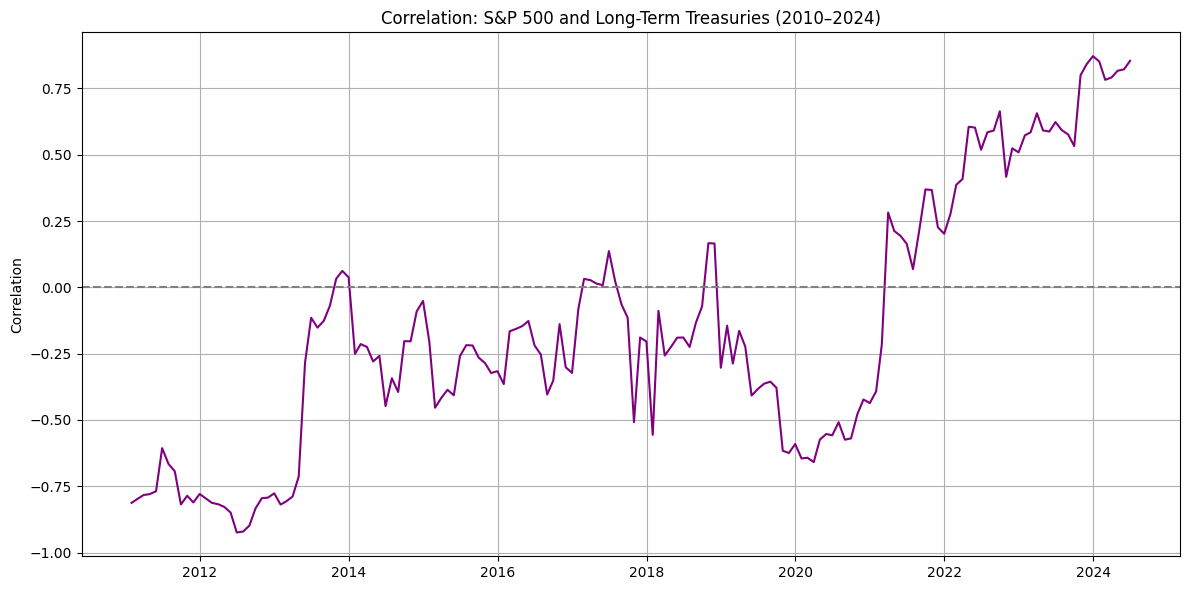

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# Define date range
start_date = "2010-01-01"
end_date = "2024-07-01"

# Download S&P 500 and TLT (long-term Treasury ETF)
sp500 = yf.download("^GSPC", start=start_date, end=end_date)["Close"]
tlt = yf.download("TLT", start=start_date, end=end_date)["Close"]

# Convert to monthly returns
sp500_monthly = sp500.resample("M").last().pct_change().dropna()
tlt_monthly = tlt.resample("M").last().pct_change().dropna()

# Combine into one DataFrame
data = pd.concat([sp500_monthly, tlt_monthly], axis=1)
data.columns = ["S&P 500", "TLT"]

# Calculate 12-month rolling correlation
rolling_corr = data["S&P 500"].rolling(window=12).corr(data["TLT"])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr, color="purple")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Correlation: S&P 500 and Long-Term Treasuries (2010–2024)")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()